# Thompson Sampling

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [15]:
import random

total_rounds = 500
total_ads = 10
ads_selected = []
numbers_of_rewards_1 = [0] * total_ads
numbers_of_rewards_0 = [0] * total_ads
total_rewards = 0

for round in range(total_rounds):
  ad = 0
  max_random = 0
  for i in range(total_ads):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = data.values[round, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1
  total_rewards += reward

## Visualising the results - Histogram

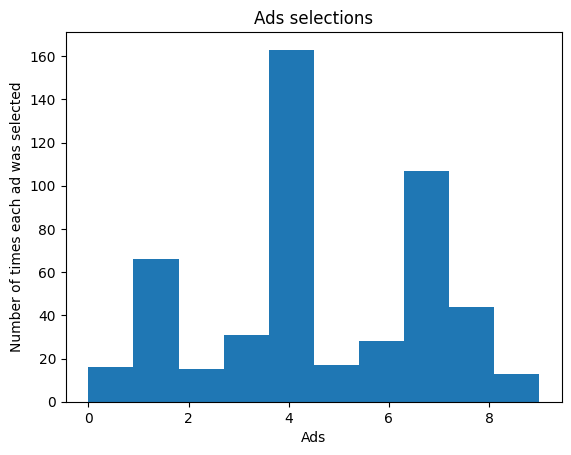

In [16]:
plt.hist(ads_selected)
plt.title('Ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()